In [1]:
#number_of_streamlines.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 11 July 2018.
#compare evolutions

In [2]:
#restore output
dirs = ['2/', '5/', '9/', '13/', '21/', '31/']
from helper_fns import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, lambda0, monitor = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*shear_viscosity)
    print 'output_folder = ', output_folder
    print 'r.shape = ', r.shape
    times_viscous = times/viscous_timescale
    everything += [(r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous)]

output_folder =  2/output
r.shape =  (1001, 2, 241)
output_folder =  5/output
r.shape =  (1001, 5, 241)
output_folder =  9/output
r.shape =  (1001, 9, 241)
output_folder =  13/output
r.shape =  (1001, 13, 241)
output_folder =  21/output
r.shape =  (1001, 21, 241)
output_folder =  31/output
r.shape =  (1001, 31, 241)


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np
import pandas as pd

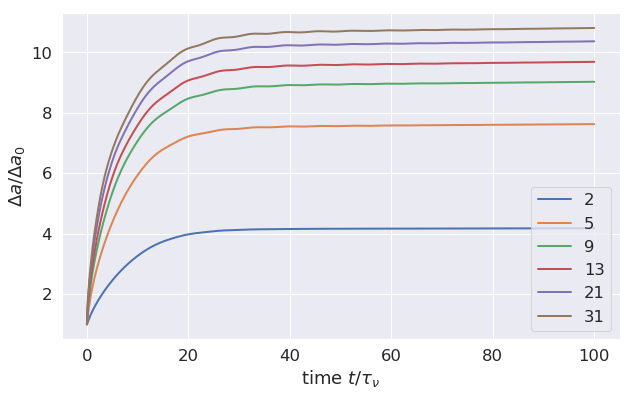

In [4]:
#plot delta_a versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    a_inner = a[:, 0, :].mean(axis=1)
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    delta_a = a_outer - a_inner
    x = times_viscous
    y = delta_a/radial_width
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=str(number_of_streamlines))
p = ax.set_ylabel(r'$\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()
p = plt.savefig('figs/a_versus_t_streamlines.pdf', bbox_inches='tight')

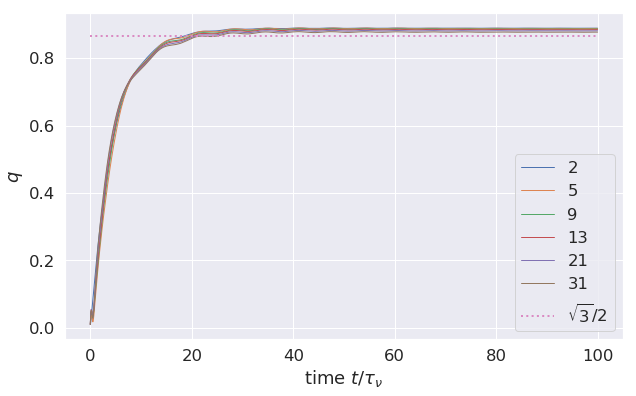

In [5]:
#plot q versus time
from libration import *
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    x = times_viscous
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=1, label=dir[0:-1])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r'$q$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend(loc='lower right')
p = plt.savefig('figs/q_versus_t_streamlines.pdf', bbox_inches='tight')

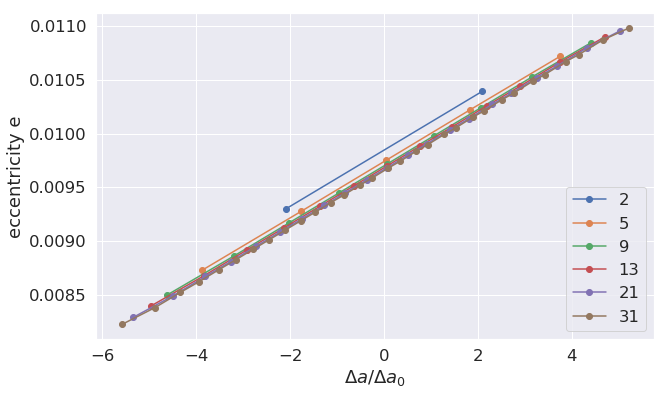

In [6]:
#plot e versus a
from libration import *
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    tm = total_number_of_outputs - 1
    x = a[tm].mean(axis=1)
    x -= x.mean()
    x = x/radial_width
    y = e[tm].mean(axis=1)
    label = str(number_of_streamlines)
    p = ax.plot(x, y, linestyle='-', marker='o', label=label)
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'$\Delta a/\Delta a_0$')
p = ax.legend(loc='lower right')
p = plt.savefig('figs/e_vs_da_streamlines.pdf', bbox_inches='tight')

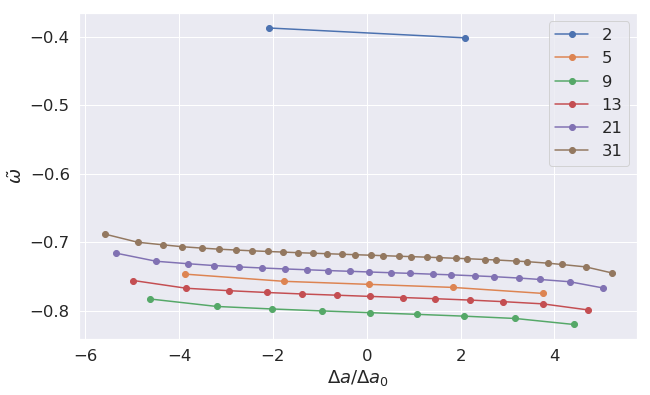

In [7]:
#plot wt versus a
from libration import *
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    tm = total_number_of_outputs - 1
    x = a[tm].mean(axis=1)
    x -= x.mean()
    x = x/radial_width
    y = wt[tm].mean(axis=1)
    label = str(number_of_streamlines)
    p = ax.plot(x, y, linestyle='-', marker='o', label=label)
p = ax.set_ylabel(r'$\tilde{\omega}$')
p = ax.set_xlabel(r'$\Delta a/\Delta a_0$')
p = plt.legend(loc='upper right')
p = plt.savefig('figs/wt_vs_da_streamlines.pdf', bbox_inches='tight')